In [1]:
import re
import matplotlib.pyplot as plt
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
from gensim.utils import simple_preprocess
import gensim
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.wrappers import Bidirectional

import pandas
import pickle
import bz2
import _pickle as cPickle
import zipfile
from tqdm import tqdm

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [2]:
df=pd.read_csv(r"C:\Users\chriq\OneDrive\Documents\my_data\Textminingdata\text_financial\speech_spy.csv", parse_dates=['date'])

In [3]:
df['contents'] = df['contents'].apply(lambda x: x.replace('\n\n[SECTION]\n\n', '').replace('\n', ' ').replace('\r', ' ').strip())
df

,Unnamed: 0,date,contents,speaker,title,SPY: d-1,SPY: d+0,SPY: d+1,SPY: d+2,SPY: d+3,...,SPY: d+5,SPY: d+6,SPY: d+7,SPY: d+8,SPY: d+9,SPY: d+10,SPY: d+11,SPY: d+12,SPY: d+13,SPY: d+14
0,0,1996-06-13,Remarks by Chairman Alan Greenspan Bank superv...,Chairman Alan Greenspan,Bank supervision in a world economy,25.864319,26.137705,26.247076,26.228842,26.228842,...,26.083029,26.210615,26.010128,25.353931,25.335707,25.317488,25.408623,25.499762,25.481527,25.809631
1,1,1996-06-18,"Remarks by Governor Edward W. Kelley, Jr. Deve...","Governor Edward W. Kelley, Jr.",Developments in electronic money and banking,26.242840,26.297781,26.297781,26.462601,26.316103,...,26.499220,26.480902,26.389343,25.839956,25.968130,25.894896,25.986469,25.949833,26.316103,26.371027
2,2,1996-09-08,Monetary Policy Objectives and StrategyI want ...,Governor Laurence H. Meyer,Monetary policy objectives and strategy,25.876574,25.858263,26.389343,26.462601,26.224524,...,26.389343,26.718983,26.627411,26.499220,26.755627,26.718983,26.627411,26.535849,26.444286,26.206215
3,3,1996-09-19,Remarks by Chairman Alan Greenspan Regulation ...,Chairman Alan Greenspan,Regulation and electronic payment systems,26.096848,26.170630,26.465719,26.539494,26.521049,...,26.594809,26.484146,26.410383,26.391937,26.465719,26.447269,26.262844,26.391937,26.539494,26.521049
4,4,1996-10-02,Remarks by Governor Lawrence B. Lindsey At th...,Governor Lawrence B. Lindsey,Small business is big business,26.779249,26.871473,27.019001,27.019001,27.037451,...,27.277197,27.295652,27.314091,27.295652,27.406319,27.480087,27.443205,27.350975,27.369415,27.184986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,1564,2021-12-17,"The Federal Reserve, the central bank of the U...",Governor Christopher J. Waller,A Hopeless and Imperative Endeavor: Lessons fr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1565,1565,2022-02-18,"The Federal Reserve, the central bank of the U...",Governor Lael Brainard,Preparing for the Financial System of the Future,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566,1566,2022-02-18,"The Federal Reserve, the central bank of the U...",Governor Christopher J. Waller,"Comments on ""Some Benefits and Risks of a Hot ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,1567,2022-02-21,"The Federal Reserve, the central bank of the U...",Governor Michelle W. Bowman,High Inflation and the Outlook for Monetary Po...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.contents.iloc[0])

Remarks by Chairman Alan Greenspan Bank supervision in a world economy  At the International Conference of Banking Supervisors, Stockholm, Sweden  June 13, 1996I am honored to present the William Taylor Memorial       Lecture to such a distinguished group of senior bank supervisors       from around the world.  I am especially delighted to have with us       Bill's wife, Sharon, and daughter, Claire.  This visit gives them       the opportunity to meet more of Bill's colleagues and to       appreciate, once again, the great importance of the work he did.Those of you who had the opportunity to know Bill can       recall him as a dedicated bank supervisor and an outstanding       public servant.  We in the United States were certainly fortunate       to have had him lead our bank supervisory functions at the       Federal Reserve and the FDIC while the U.S. banking system was       experiencing quite difficult times.  To me, no individual       displayed the characteristics necessary for

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1569 non-null   int64         
 1   date        1569 non-null   datetime64[ns]
 2   contents    1569 non-null   object        
 3   speaker     1567 non-null   object        
 4   title       1569 non-null   object        
 5   SPY: d-1    223 non-null    float64       
 6   SPY: d+0    223 non-null    float64       
 7   SPY: d+1    223 non-null    float64       
 8   SPY: d+2    223 non-null    float64       
 9   SPY: d+3    223 non-null    float64       
 10  SPY: d+4    223 non-null    float64       
 11  SPY: d+5    223 non-null    float64       
 12  SPY: d+6    223 non-null    float64       
 13  SPY: d+7    223 non-null    float64       
 14  SPY: d+8    223 non-null    float64       
 15  SPY: d+9    223 non-null    float64       
 16  SPY: d+10   223 non-null

# Preprocessing

In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chriq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
stemmer = SnowballStemmer('english')

In [11]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [12]:
processed_docs = df['contents'].map(preprocess)
processed_docs

0       [remark, chairman, alan, greenspan, bank, supe...
1       [remark, governor, edward, kelley, develop, el...
2       [monetari, polici, object, strategyi, want, sh...
3       [remark, chairman, alan, greenspan, regul, ele...
4       [remark, governor, lawrenc, lindsey, small, bu...
                              ...                        
1564    [feder, reserv, central, bank, unit, state, pr...
1565    [feder, reserv, central, bank, unit, state, pr...
1566    [feder, reserv, central, bank, unit, state, pr...
1567    [feder, reserv, central, bank, unit, state, pr...
1568    [feder, reserv, central, bank, unit, state, pr...
Name: contents, Length: 1569, dtype: object

In [13]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abil
1 absenc
2 absorb
3 abus
4 accept
5 access
6 accomplish
7 accord
8 accur
9 achiev
10 act


In [14]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [15]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[43]

[(3, 1),
 (4, 1),
 (10, 1),
 (18, 1),
 (26, 1),
 (27, 3),
 (32, 1),
 (33, 3),
 (41, 5),
 (48, 1),
 (53, 1),
 (57, 1),
 (58, 6),
 (59, 1),
 (61, 1),
 (62, 2),
 (64, 1),
 (66, 1),
 (67, 1),
 (69, 1),
 (71, 1),
 (79, 1),
 (83, 1),
 (85, 1),
 (86, 1),
 (91, 2),
 (94, 1),
 (96, 1),
 (98, 2),
 (101, 1),
 (109, 1),
 (110, 1),
 (113, 1),
 (114, 1),
 (120, 4),
 (122, 2),
 (125, 1),
 (129, 2),
 (136, 1),
 (140, 2),
 (142, 2),
 (143, 1),
 (158, 1),
 (163, 1),
 (164, 2),
 (165, 1),
 (171, 8),
 (174, 1),
 (177, 2),
 (183, 1),
 (185, 1),
 (192, 1),
 (197, 1),
 (199, 2),
 (207, 1),
 (214, 1),
 (216, 2),
 (220, 3),
 (222, 15),
 (223, 5),
 (224, 3),
 (227, 29),
 (229, 1),
 (240, 1),
 (242, 1),
 (248, 1),
 (251, 1),
 (273, 1),
 (274, 2),
 (276, 4),
 (279, 1),
 (280, 1),
 (287, 1),
 (299, 1),
 (303, 1),
 (306, 1),
 (309, 1),
 (313, 4),
 (314, 1),
 (320, 1),
 (329, 1),
 (338, 2),
 (350, 4),
 (351, 1),
 (359, 6),
 (360, 2),
 (361, 1),
 (367, 1),
 (369, 1),
 (376, 1),
 (378, 2),
 (384, 1),
 (391, 1),
 (395,

In [16]:
bow_doc_43 = bow_corpus[43]

for i in range(len(bow_doc_43)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_43[i][0], 
                                                     dictionary[bow_doc_43[i][0]], 
                                                     bow_doc_43[i][1]))

Word 3 ("accept") appears 1 time.
Word 4 ("accomplish") appears 1 time.
Word 10 ("adopt") appears 1 time.
Word 18 ("analyz") appears 1 time.
Word 26 ("ask") appears 1 time.
Word 27 ("assist") appears 3 time.
Word 32 ("avoid") appears 1 time.
Word 33 ("banker") appears 3 time.
Word 41 ("borrow") appears 5 time.
Word 48 ("chairman") appears 1 time.
Word 53 ("circumst") appears 1 time.
Word 57 ("commerci") appears 1 time.
Word 58 ("commit") appears 6 time.
Word 59 ("common") appears 1 time.
Word 61 ("compet") appears 1 time.
Word 62 ("competit") appears 2 time.
Word 64 ("complianc") appears 1 time.
Word 66 ("conclud") appears 1 time.
Word 67 ("conclus") appears 1 time.
Word 69 ("confer") appears 1 time.
Word 71 ("contact") appears 1 time.
Word 79 ("coordin") appears 1 time.
Word 83 ("creation") appears 1 time.
Word 85 ("criteria") appears 1 time.
Word 86 ("cross") appears 1 time.
Word 91 ("default") appears 2 time.
Word 94 ("demonstr") appears 1 time.
Word 96 ("depositori") appears 1 time

In [17]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.022298357188289916),
 (1, 0.0657984057722947),
 (2, 0.03726698128945797),
 (3, 0.017229385582308795),
 (4, 0.023310406649798724),
 (5, 0.0281728529095527),
 (6, 0.02044524228923717),
 (7, 0.023411070902583358),
 (8, 0.021403208525475666),
 (9, 0.0485364219142207),
 (10, 0.013274818619162113),
 (11, 0.02875846754480235),
 (12, 0.04899951012875232),
 (13, 0.03184391153328655),
 (14, 0.04102321542075535),
 (15, 0.04547813676162573),
 (16, 0.021061865151378197),
 (17, 0.021577332240437768),
 (18, 0.020688361932486344),
 (19, 0.04205456241293362),
 (20, 0.015423120871476364),
 (21, 0.033016459803017206),
 (22, 0.027582449758777307),
 (23, 0.025490267636447416),
 (24, 0.013506986320553839),
 (25, 0.0383477907562715),
 (26, 0.04089048457847434),
 (27, 0.03647459653774186),
 (28, 0.04622281438264995),
 (29, 0.018069304248734687),
 (30, 0.011295169093765548),
 (31, 0.032291813348404225),
 (32, 0.012934227190372521),
 (33, 0.027013972641107678),
 (34, 0.046347114887413436),
 (35, 0.009614

# LDA using bag of words

In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [19]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.009*"crisi" + 0.007*"regulatori" + 0.005*"liquid" + 0.005*"save" + 0.005*"mortgag" + 0.004*"rule" + 0.004*"communiti" + 0.004*"compani" + 0.004*"insur" + 0.004*"lend"
Topic: 1 
Words: 0.009*"liquid" + 0.007*"loan" + 0.007*"system" + 0.005*"crisi" + 0.005*"trade" + 0.005*"communiti" + 0.005*"household" + 0.005*"loss" + 0.004*"deriv" + 0.004*"model"
Topic: 2 
Words: 0.008*"liquid" + 0.008*"inflat" + 0.005*"crisi" + 0.005*"trade" + 0.004*"investor" + 0.004*"loan" + 0.004*"labor" + 0.004*"system" + 0.004*"lend" + 0.004*"recoveri"
Topic: 3 
Words: 0.010*"system" + 0.008*"technolog" + 0.008*"insur" + 0.006*"mortgag" + 0.006*"regulatori" + 0.006*"compani" + 0.005*"innov" + 0.005*"supervis" + 0.004*"loan" + 0.004*"inflat"
Topic: 4 
Words: 0.008*"technolog" + 0.007*"stress" + 0.007*"test" + 0.006*"communiti" + 0.006*"model" + 0.006*"inflat" + 0.006*"innov" + 0.006*"worker" + 0.005*"labor" + 0.004*"educ"
Topic: 5 
Words: 0.016*"inflat" + 0.013*"basel" + 0.008*"labor" + 0.007*"

# LDA using TF-IDF

In [20]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [21]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"communiti" + 0.003*"anpr" + 0.003*"inflat" + 0.002*"contact" + 0.002*"updat" + 0.002*"news" + 0.002*"novemb" + 0.002*"euro" + 0.002*"loan" + 0.002*"famili"
Topic: 1 Word: 0.004*"inflat" + 0.004*"basel" + 0.002*"communiti" + 0.002*"crisi" + 0.002*"test" + 0.002*"stress" + 0.002*"trade" + 0.002*"fomc" + 0.002*"labor" + 0.002*"fiscal"
Topic: 2 Word: 0.003*"communiti" + 0.003*"mortgag" + 0.003*"inflat" + 0.003*"liquid" + 0.003*"technolog" + 0.003*"educ" + 0.002*"worker" + 0.002*"loan" + 0.002*"hous" + 0.002*"crisi"
Topic: 3 Word: 0.005*"communiti" + 0.003*"neighborhood" + 0.003*"organ" + 0.003*"consolid" + 0.003*"regulatori" + 0.002*"affili" + 0.002*"loan" + 0.002*"insur" + 0.002*"supervisor" + 0.002*"system"
Topic: 4 Word: 0.006*"inflat" + 0.006*"basel" + 0.004*"communiti" + 0.003*"libor" + 0.002*"fomc" + 0.002*"loan" + 0.002*"currenc" + 0.002*"fiscal" + 0.002*"neutral" + 0.002*"labor"
Topic: 5 Word: 0.005*"inflat" + 0.003*"digit" + 0.003*"stablecoin" + 0.002*"labor"

# Doc2vec

In [22]:
def read_corpus(f, tokens_only=False):
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(df.contents))

In [23]:
#session crashed when i ran this, even when I had a GPU connected it didnt seem to use the GPU
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec(train_corpus, vector_size=200, window=3, min_count=1, workers=4)

In [24]:
def getVecs(model_name, corpus, size):
    vecs = [np.array(model_name[z.tags[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)
train_vecs_dm = getVecs(model, train_corpus, 200)

In [25]:
train_vecs_dm

array([[-0.46028304,  0.27828744, -0.03611938, ..., -0.5242075 ,
        -0.21886452, -0.01668075],
       [-0.43072367, -0.3945978 , -1.2504573 , ..., -0.7534552 ,
         0.08297158,  0.5273262 ],
       [-0.5192625 ,  0.42676467, -0.2546557 , ...,  0.02710702,
         1.0611064 , -0.5206787 ],
       ...,
       [-1.4478871 , -0.05376279, -0.7543352 , ..., -0.14929026,
         0.34473768, -0.1625853 ],
       [ 0.07863425,  0.0998982 ,  1.7675173 , ..., -0.7074771 ,
         0.9194357 ,  1.0557315 ],
       [ 0.5810073 , -0.29430813, -0.44603845, ...,  0.04686763,
         0.52361673,  0.48599145]], dtype=float32)

# Predictions on SPY changes


In [26]:
def pct_change_from_day_0(announcement):
    pct_change= (announcement['SPY: d+7']/announcement['SPY: d-1'])-1
    if pct_change>0:
        return 'up'
    else:
        return 'down'

In [27]:
pct_change_from_day_0(df.iloc[141])

'up'

In [28]:
df['+7change']=df.apply(pct_change_from_day_0,axis=1)

In [29]:
df.iloc[141]

Unnamed: 0                                                  141
date                                        1999-03-25 00:00:00
contents      Thinking about Y2KI am delighted to be back on...
speaker                          Governor Edward W. Kelley, Jr.
title                                        Thinking about Y2K
SPY: d-1                                              82.560066
SPY: d+0                                              82.773079
SPY: d+1                                              84.295692
SPY: d+2                                              84.516586
SPY: d+3                                              86.441551
SPY: d+4                                              86.457344
SPY: d+5                                              86.899109
SPY: d+6                                              86.015572
SPY: d+7                                              86.480988
SPY: d+8                                              87.735367
SPY: d+9                                

In [30]:
df['+7change'].value_counts()

down    1432
up       137
Name: +7change, dtype: int64

In [31]:
labels=df['+7change'].to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [32]:
labels_onehot[:10]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_vecs_dm,labels_onehot,train_size=0.9)
print (len(X_train),len(X_test),len(y_train),len(y_test))

1412 157 1412 157


In [34]:
X_train_m, X_val, y_train_m, y_val = train_test_split(X_train,y_train,train_size=0.9)
print (len(X_train_m),len(X_val),len(y_train_m),len(y_val))

1270 142 1270 142


In [35]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

history=model.fit(X_train_m, y_train_m,validation_data=(X_val,y_val), epochs = 30, batch_size = 100)

Epoch 1/30
13/13 [==============================] - 6s 286ms/step - loss: 0.2808 - accuracy: 0.5740 - val_loss: 0.2292 - val_accuracy: 0.8592
Epoch 2/30
13/13 [==============================] - 3s 233ms/step - loss: 0.2584 - accuracy: 0.6315 - val_loss: 0.2145 - val_accuracy: 0.8592
Epoch 3/30
13/13 [==============================] - 3s 237ms/step - loss: 0.2379 - accuracy: 0.6858 - val_loss: 0.2014 - val_accuracy: 0.8592
Epoch 4/30
13/13 [==============================] - 3s 235ms/step - loss: 0.2262 - accuracy: 0.7126 - val_loss: 0.1907 - val_accuracy: 0.8592
Epoch 5/30
13/13 [==============================] - 3s 240ms/step - loss: 0.2083 - accuracy: 0.7638 - val_loss: 0.1803 - val_accuracy: 0.8592
Epoch 6/30
13/13 [==============================] - 3s 241ms/step - loss: 0.1915 - accuracy: 0.7961 - val_loss: 0.1706 - val_accuracy: 0.8592
Epoch 7/30
13/13 [==============================] - 3s 243ms/step - loss: 0.1815 - accuracy: 0.8000 - val_loss: 0.1599 - val_accuracy: 0.8592
Epoch 

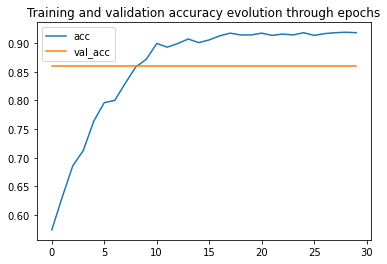

In [39]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy evolution through epochs')
plt.legend()
plt.show()

In [37]:
model.evaluate(X_train,y_train)

45/45 [==============================] - 2s 34ms/step - loss: 0.0796 - accuracy: 0.9122


[0.07957658171653748, 0.9121813178062439]

In [38]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 35ms/step - loss: 0.0753 - accuracy: 0.9172


[0.07533183693885803, 0.9171974658966064]